Referencia: [ArcFace](https://pypi.org/project/arcface/)

# Setup

In [ ]:
# For face recognition
!pip install arcface

     |████████████████████████████████| 51.0MB 137kB/s 
     |████████████████████████████████| 645kB 35.8MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# For genuine/impostor curves
!pip install pyeer

     |████████████████████████████████| 614kB 4.3MB/s 
  Created wheel for pyeer: filename=pyeer-0.5.5-cp37-none-any.whl size=604267 sha256=a653ed073935e4e2e9d8c54c3701e9ce57a7ec5e01dc81ab0e54af2ec23fdf11
  Stored in directory: /root/.cache/pip/wheels/11/84/dc/8c50eb806263b6d79c80864c2ab52d8a8bc6cbbb5a9d224110
Successfully built pyeer


# Data

# Libraries

In [ ]:
from arcface import ArcFace
import numpy as np
import os, fnmatch
import seaborn as sn
import numpy as np
import cv2
from collections import namedtuple
from tqdm.auto import tqdm
from pyeer.eer_info import get_eer_stats
from pyeer.plot import plot_eer_stats
import matplotlib as plt
import matplotlib_inline



In [ ]:
face_rec = ArcFace.ArcFace()

# Functions

In [ ]:
# List of files of a directory
def dirfiles(img_path,img_ext):
  # Example: img_names = dirfiles('/content/Test/','X*.jpg')
  img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
  return img_names

# Embedding of a file image
def image2arcface(image_path):
  # Example: x = image2arcface('/content/Test/B000011.jpg')
  embedding = face_rec.calc_emb(image_path)
  return embedding

# Embedding of a file list
def imagelist2arcface(img_path,img_names):
  # Example: img_names = dirfiles('/content/Test/','X*.jpg')
  #          X = imagelist2arcface('/content/Test/',img_names)
    n = len(img_names)
    embeddings = np.zeros((n,512))
    for i in tqdm(range(n)):
      embeddings[i,:] = image2arcface(img_path+img_names[i])
    return embeddings

# Labels (ground truth): m face images per subject
def face_labels(Z,m):
  n = Z.shape[0]
  y = np.zeros((n,),int)
  for i in range(n):
    y[i] = i/m
  return y

# Compute genuine and impostor scores
def genuine_impostor_scores(Z,y):
  print('computing genuine/impostor scores...')
  n = Z.shape[0]
  gscores = np.zeros((n*n,))
  iscores = np.zeros((n*n,))
  tg = 0
  ti = 0
  for i in tqdm(range(n)):
    for j in range(n):
      if y[i]==y[j]:
        gscores[tg] = Z[i,j]
        tg = tg+1
      else:
        iscores[ti] = Z[i,j]
        ti = ti+1
  gscores = gscores[0:tg]
  iscores = iscores[0:ti]
  return gscores,iscores

# ORL dataset

In [ ]:
!wget https://www.dropbox.com/s/cdjqldkfrobnbex/ORL.zip?dl=0
!unzip ORL.zip > unzip.txt

--2021-06-24 16:55:22--  https://www.dropbox.com/s/utna2z7oqqn6jz2/ORL.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/utna2z7oqqn6jz2/ORL.zip [following]
--2021-06-24 16:55:22--  https://www.dropbox.com/s/raw/utna2z7oqqn6jz2/ORL.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc777950390e09f2a0a33dcb8962.dl.dropboxusercontent.com/cd/0/inline/BRAcmXb0BlNMT6kfYMo0DEtVvHRMm2UwvDk_HPIJshDwM0v0I7XYb12krdvPxS-IoByPPk4kDU4R-TKDmGjS6PIGKOuT2WGhvy7xv_jlYtRR6mWqrUptF2ZltZuXOFFQ0QdG5cZd36zqrZyre3hJn4wP/file# [following]
--2021-06-24 16:55:23--  https://uc777950390e09f2a0a33dcb8962.dl.dropboxusercontent.com/cd/0/inline/BRAcmXb0BlNMT6kfYMo0DEtVvHRMm2UwvDk_HPIJshDwM0v0I7XYb12krdvPxS-IoByPPk4kDU4R-TKDmGjS6PIGKOuT2WGhvy7xv_

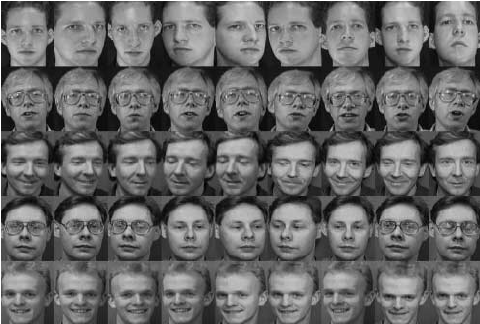

## Individual comparisons

In [ ]:
A18 = image2arcface('ORL/face_18_01.png') # person 18
A19 = image2arcface('ORL/face_19_01.png') # person 19
B18 = image2arcface('ORL/face_18_02.png') # person 18
B19 = image2arcface('ORL/face_19_02.png') # person 19

th = 0.45
print('same person: (score > th) th = '+str(th))
s1 = np.dot(A18,B18.T)
print('comparison: A18 with B18 (same person) -> score: '+str(s1)+' same person? '+str(s1>th))
s2 = np.dot(A19,B19.T)
print('comparison: A19 with B19 (same person) -> score: '+str(s2)+' same person? '+str(s2>th))
s3 = np.dot(A18,B19.T)
print('comparison: A18 with B19 (different person) -> score: '+str(s3)+' same person? '+str(s3>th))
s4 = np.dot(A19,B18.T)
print('comparison: A19 with B18 (different person) -> score: '+str(s4)+' same person? '+str(s4>th))

same person: (score > th) th = 0.45
comparison: A18 with B18 (same person) -> score: 0.90717345 same person? True
comparison: A19 with B19 (same person) -> score: 0.8762167 same person? True
comparison: A18 with B19 (different person) -> score: 0.07688516 same person? False
comparison: A19 with B18 (different person) -> score: 0.2196249 same person? False


## Embedding extraction

In [ ]:
fpath = 'ORL/'
img_names = dirfiles(fpath,'face*.png')
X         = imagelist2arcface(fpath,img_names)

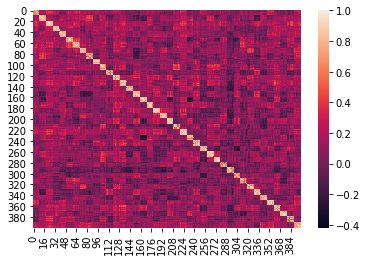

In [ ]:
Z = np.dot(X,X.T)
sn.heatmap(Z, annot=False)

In [ ]:
y = face_labels(Z,10)

## Stats

In [ ]:
gscores,iscores = genuine_impostor_scores(Z,y)

computing genuine/impostor scores...


In [ ]:
# Calculating stats for classifier A

stats = get_eer_stats(gscores, iscores)
plot_eer_stats([stats], ['ORL'])


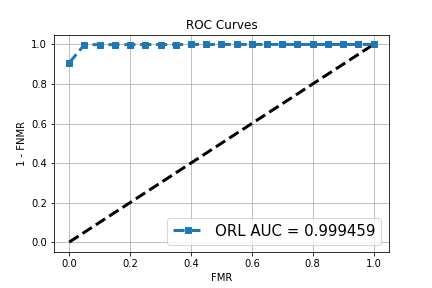

In [ ]:
I = cv2.imread('ROC.png')
plt.imshow(I)


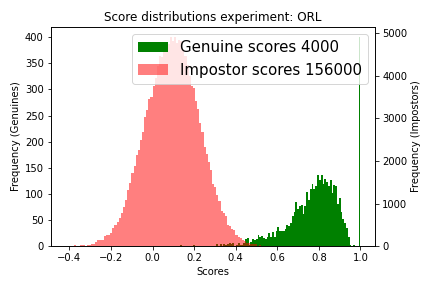

In [ ]:
I = cv2.imread('Distributions (ORL).png')
plt.imshow(I)


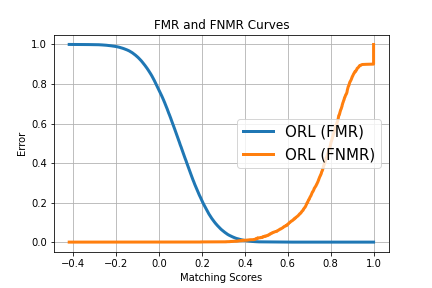

In [ ]:
I = cv2.imread('FMR and FNMR curves (ORL).png');
plt.imshow(I)

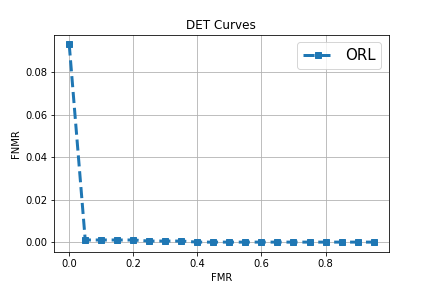

In [ ]:
I = cv2.imread('DET.png');
plt.imshow(I)

#AR-LQ dataset

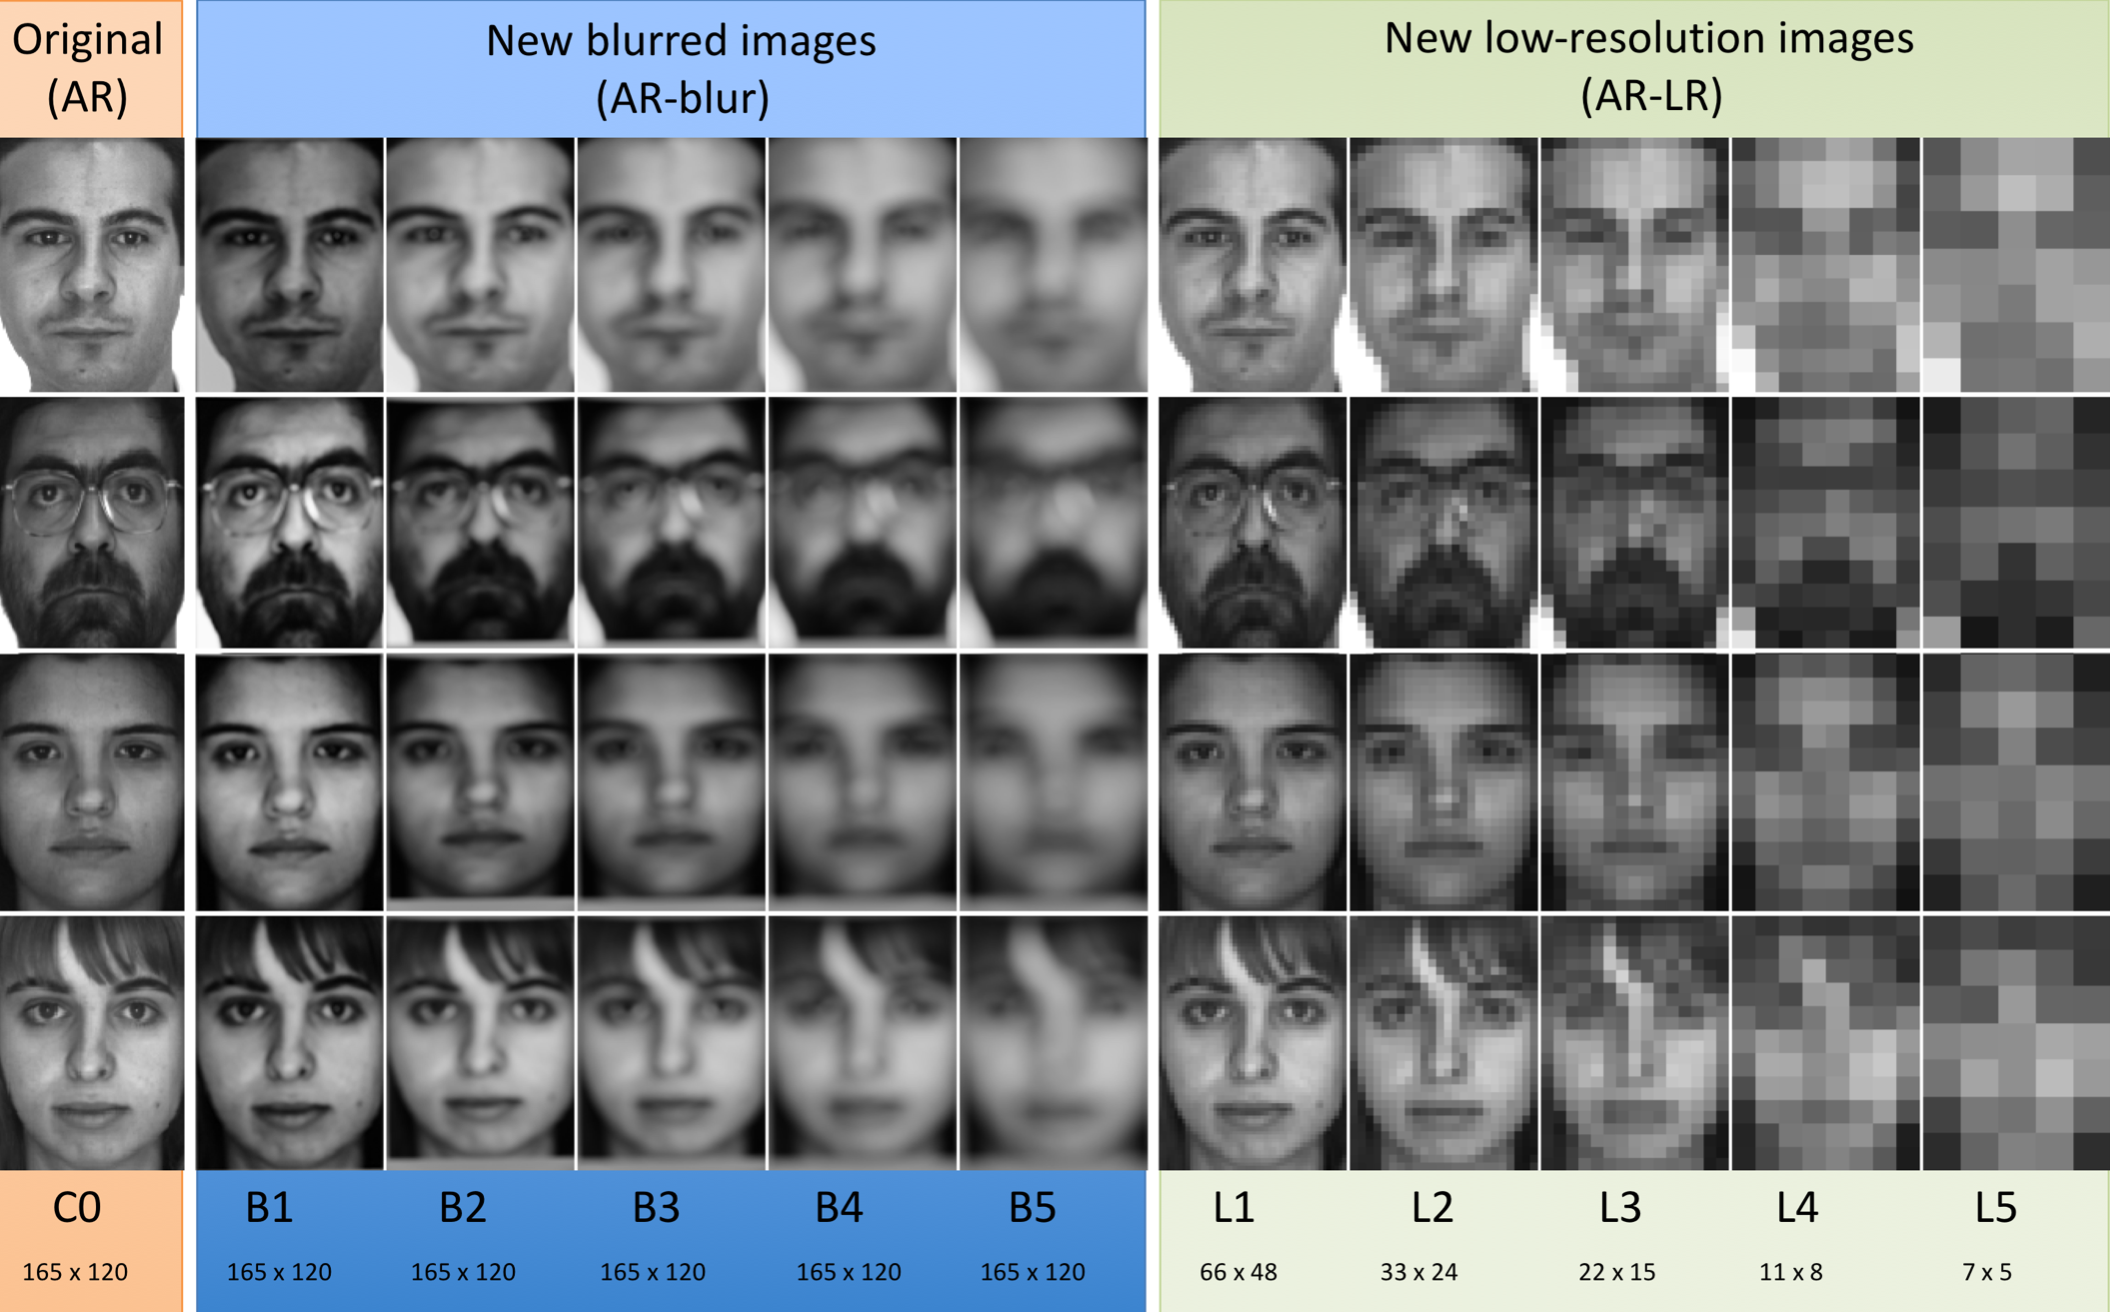

In [ ]:
!wget https://www.dropbox.com/s/zc2obs4a0pn6wp5/faces_ARLQ.zip
!unzip faces_ARLQ.zip > unzip.txt

--2021-06-15 14:36:46--  https://www.dropbox.com/s/zc2obs4a0pn6wp5/faces_ARLQ.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zc2obs4a0pn6wp5/faces_ARLQ.zip [following]
--2021-06-15 14:36:46--  https://www.dropbox.com/s/raw/zc2obs4a0pn6wp5/faces_ARLQ.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce4e9e62efa81fe9d0d61e4b03b.dl.dropboxusercontent.com/cd/0/inline/BQdLbsOckkRLZacwqC5LKjn961x6G4SNoYf2qHDRgn6dG-QYB_o4-4zH5kde_-jNJpAKAAPvcV0V6-rr4ItHOMNiU9sd4q29yuYRFnglfFPpOletb6oHdkznnwjKSF4ir76N4aqcIB_i_s0WsqmmBrdg/file# [following]
--2021-06-15 14:36:47--  https://uce4e9e62efa81fe9d0d61e4b03b.dl.dropboxusercontent.com/cd/0/inline/BQdLbsOckkRLZacwqC5LKjn961x6G4SNoYf2qHDRgn6dG-QYB_o4-4zH5kde_-jNJpAKAAPvcV0V6-rr4ItH

# Embdedding Extraction

In [ ]:
fpath = 'faces_ARLQ/'
img_names = dirfiles(fpath,'face*.png')
X         = imagelist2arcface(fpath,img_names)

# Comparisons

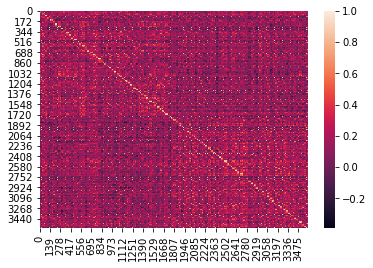

In [ ]:
Z = np.dot(X,X.T)
sn.heatmap(Z, annot=False)

In [ ]:
y = face_labels(Z,36)

In [ ]:
gscores,iscores = genuine_impostor_scores(Z,y)

computing genuine/impostor scores...


# Stats

In [ ]:
stats = get_eer_stats(gscores, iscores)
plot_eer_stats([stats], ['ARLQ'])

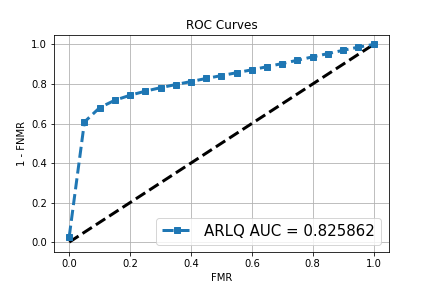

In [ ]:
I = cv2.imread('ROC.png')
plt.imshow(I)

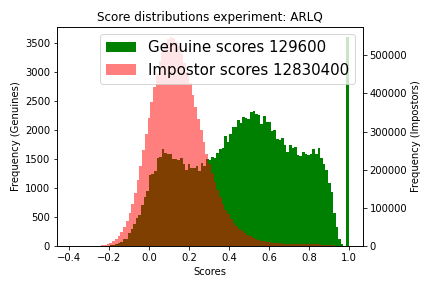

In [ ]:
I = cv2.imread('Distributions (ARLQ).png')
plt.imshow(I)

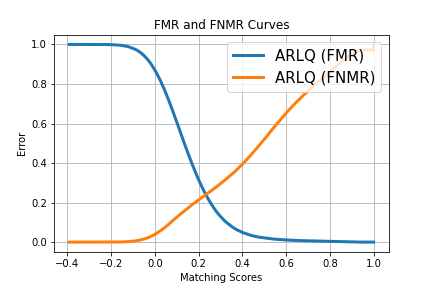

In [ ]:
I = cv2.imread('FMR and FNMR curves (ARLQ).png');
plt.imshow(I)

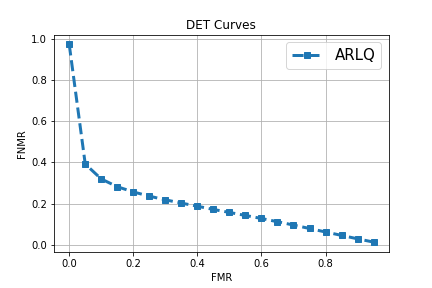

In [ ]:
I = cv2.imread('DET.png');
plt.imshow(I)